# Table interactive plot

In previous tutorials we showed how to plot the data as well as some widgets which are a part of the table object. In this tutorial, we show how an interactive plot can be built.

Same as in previous tutorials, we show use a macrospin example:

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (1e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (1, 1, 1)  # discretisation cell size (m)

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='macrospin')
system.energy = mm.Zeeman(H=H)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (ExeOOMMFRunner) [2020/07/02 15:18]... (3.2 s)


By calling `mpl` method, default plot is shown:

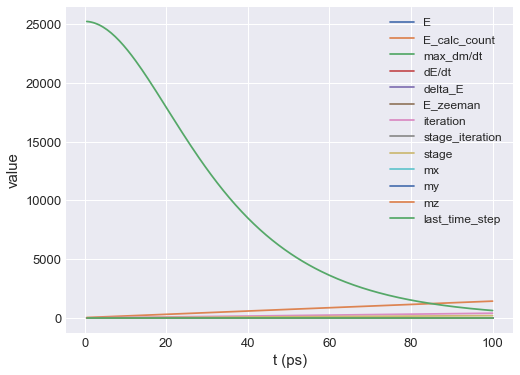

In [3]:
system.table.mpl()

By default, all data columns are plotted. To select only certain data columns, `yaxis` can be passed. `yaxis` is a list of strings, where each string matches one of the columns. For instance, if we want to plot the average magnetisation components, the plot is:

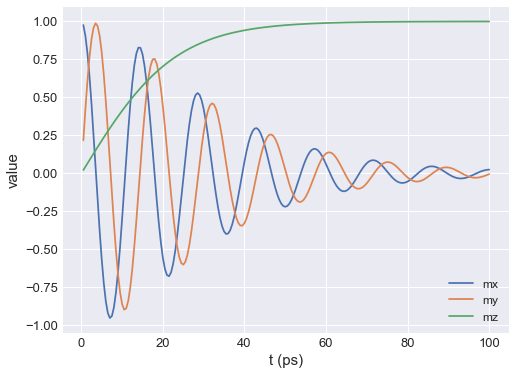

In [5]:
system.table.mpl(yaxis=['mx', 'my', 'mz'])

Now, let us say we want to interactively choose data columns we want to plot on y-axis of the plot. We start by putting our plotting inside a function and exposing the argument we want to choose:

In [8]:
def my_interactive_plot(yaxis):
    system.table.mpl(yaxis=yaxis)

Having the function defined, we have to call it with required `yaxis` argument in order to get the plot. For example,

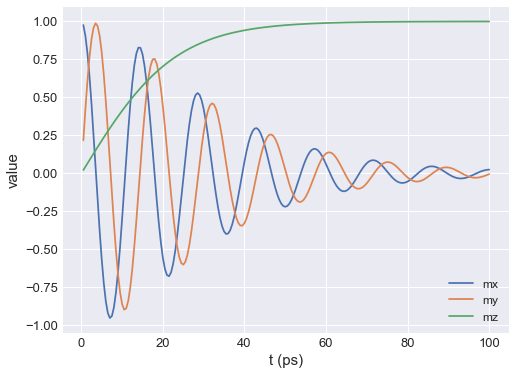

In [9]:
my_interactive_plot(yaxis=['mx', 'my', 'mz'])

To interactively change the values of `yaxis`, we have to:

1. decorate the function using `ubermagtable.interact` and
2. assign a widget to the `yaxis` in the `ubermagtable.interact` argument list.

In [12]:
# NBVAL_IGNORE_OUTPUT
@df.interact(yaxis=system.table.selector())
def my_interactive_plot(yaxis):
    system.table.mpl(yaxis=yaxis)

interactive(children=(SelectMultiple(description='y-axis:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), …

The plot, together with a selector widget is shown. In order to select multiple data columns from the widget list, we hold `Ctrl` (Windows, Linux) or `Cmd` (MacOS) and select multiple data columns.

Another argument of the plot we can interact with is the range of time values on the horizontal axis. For that, we have to expose `xlim` and assign it a slider widget.

In [13]:
# NBVAL_IGNORE_OUTPUT
@df.interact(yaxis=system.table.selector(),
             xlim=system.table.slider())
def my_interactive_plot(yaxis, xlim):
    system.table.mpl(yaxis=yaxis, xlim=xlim)

interactive(children=(SelectMultiple(description='y-axis:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), …

This way, by exposing the axes and passing any allowed `matplotlib.pyplot.plot` argument, we can customise the plot any way we like (as long as it is allowed by `matplotlib`).